In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('./dataset/medical_insurance.csv')

# Análise inicial

In [2]:

print(df.shape) 
print(df.info()) 

(1338, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   1338 non-null   int64  
 1   gender                1338 non-null   object 
 2   bmi                   1338 non-null   float64
 3   children              1338 non-null   int64  
 4   discount_eligibility  1338 non-null   object 
 5   region                1338 non-null   object 
 6   expenses              1338 non-null   float64
 7   premium               1338 non-null   float64
dtypes: float64(3), int64(2), object(3)
memory usage: 83.8+ KB
None


In [4]:
print(df.head())

   age  gender   bmi  children discount_eligibility     region  expenses  \
0   19  female  27.9         0                  yes  southwest  16884.92   
1   18    male  33.8         1                   no  southeast   1725.55   
2   28    male  33.0         3                   no  southeast   4449.46   
3   33    male  22.7         0                   no  northwest  21984.47   
4   32    male  28.9         0                   no  northwest   3866.86   

    premium  
0  168.8492  
1   17.2555  
2   44.4946  
3  439.6894  
4   77.3372  


In [3]:
print(df.describe())

               age          bmi     children      expenses      premium
count  1338.000000  1338.000000  1338.000000   1338.000000  1338.000000
mean     39.207025    30.665471     1.094918  13270.422414   262.874685
std      14.049960     6.098382     1.205493  12110.011240   292.532178
min      18.000000    16.000000     0.000000   1121.870000    11.218700
25%      27.000000    26.300000     0.000000   4740.287500    87.354250
50%      39.000000    30.400000     1.000000   9382.030000   174.997400
75%      51.000000    34.700000     2.000000  16639.915000   342.908900
max      64.000000    53.100000     5.000000  63770.430000  1983.106400


# Verificando se os dados estão corretamente padronizados

In [9]:
print(df['gender'].unique())
print(df['discount_eligibility'].unique())
print(df['region'].unique())


['female' 'male']
['yes' 'no']
['southwest' 'southeast' 'northwest' 'northeast']


# Correlação dos dados

               age       bmi  children  expenses   premium
age       1.000000  0.109341  0.042469  0.299008  0.530327
bmi       0.109341  1.000000  0.012645  0.198576  0.177888
children  0.042469  0.012645  1.000000  0.067998  0.042417
expenses  0.299008  0.198576  0.067998  1.000000  0.854005
premium   0.530327  0.177888  0.042417  0.854005  1.000000


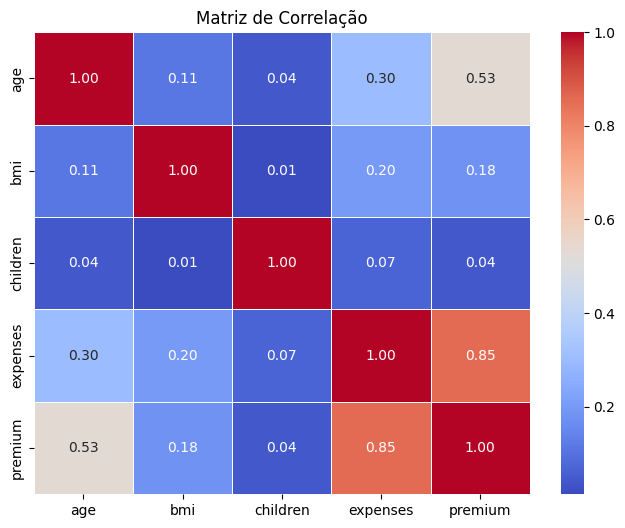

In [18]:
numericas = df.select_dtypes(include=['int64', 'float64']) ## Agrupando as colunas numéricas

correlacao = numericas.corr() ## Matriz de correlação

print(correlacao)

plt.figure(figsize=(8, 6))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()

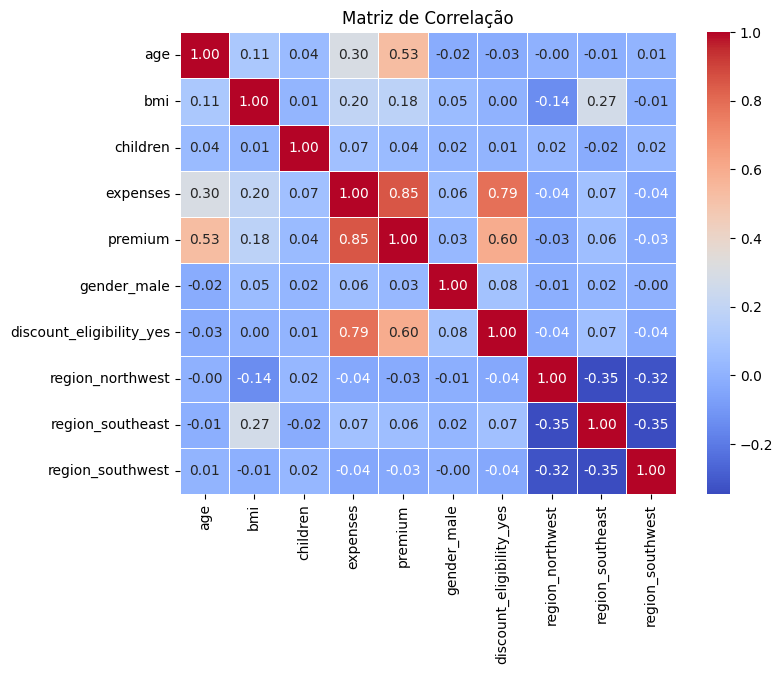

In [22]:
df_dummies = pd.get_dummies(df, drop_first=True)
correlacao_completa = df_dummies.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlacao_completa, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()

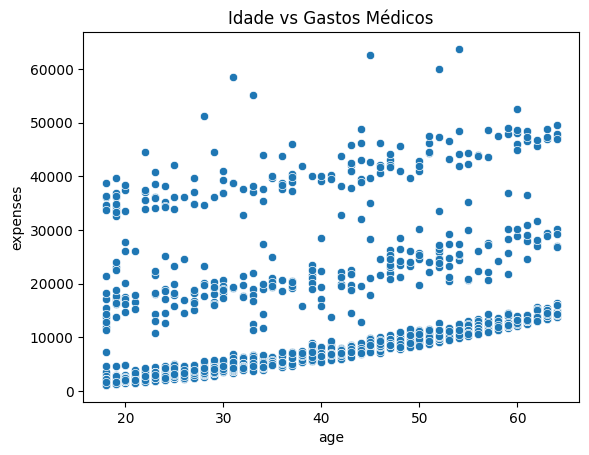

In [23]:
sns.scatterplot(x='age', y='expenses', data=df)
plt.title('Idade vs Gastos Médicos')
plt.show()


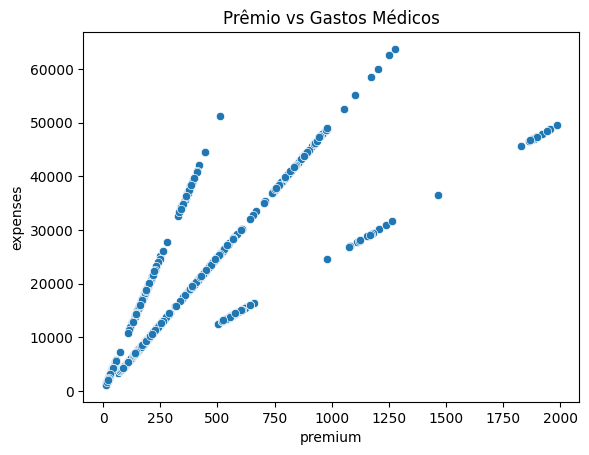

In [24]:
sns.scatterplot(x='premium', y='expenses', data=df)
plt.title('Prêmio vs Gastos Médicos')
plt.show()


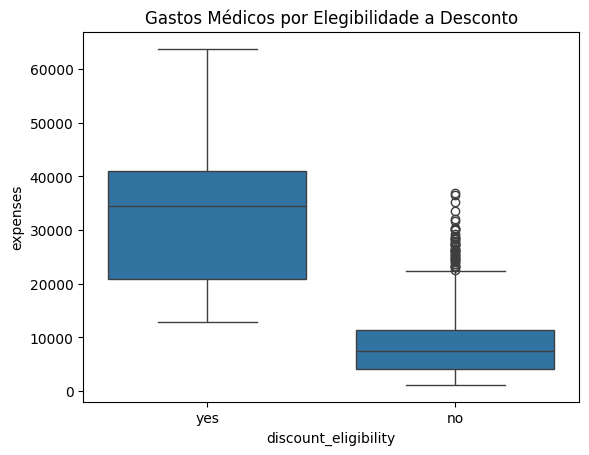

In [25]:
sns.boxplot(x='discount_eligibility', y='expenses', data=df)
plt.title('Gastos Médicos por Elegibilidade a Desconto')
plt.show()


# Prevendo Expenses utilizando Regressão Linear

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

X = df_dummies.drop(columns=['expenses'])
y = df_dummies['expenses']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_exp = LinearRegression()
model_exp.fit(X_train, y_train)

y_pred_exp = model_exp.predict(X_test)

r2 = r2_score(y_test, y_pred_exp)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_exp))
mae = mean_absolute_error(y_test, y_pred_exp)

print(f"R²: {r2:.4f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

R²: 0.8708
RMSE: 4477.93
MAE: 3137.33


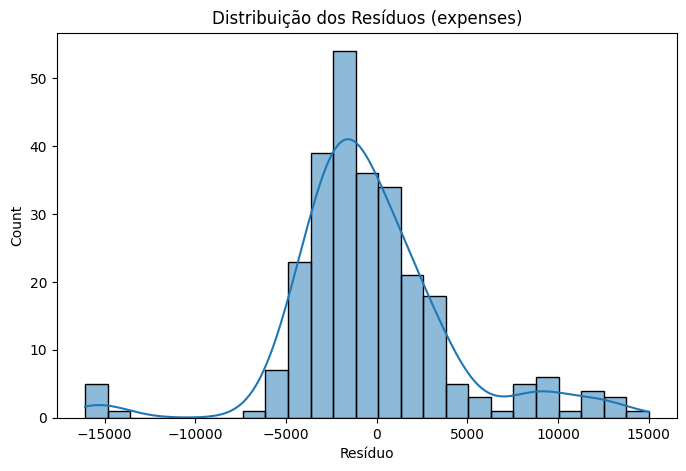

In [29]:
residuos = y_test - y_pred_exp

plt.figure(figsize=(8,5))
sns.histplot(residuos, kde=True)
plt.title("Distribuição dos Resíduos (expenses)")
plt.xlabel("Resíduo")
plt.show()


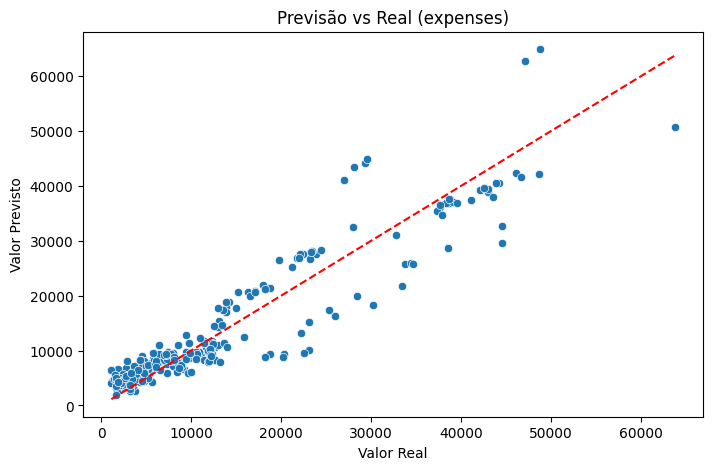

In [30]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_pred_exp)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Valor Real")
plt.ylabel("Valor Previsto")
plt.title("Previsão vs Real (expenses)")
plt.show()
